In [25]:
# pip install --upgrade opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, YouTubeVideo, Image

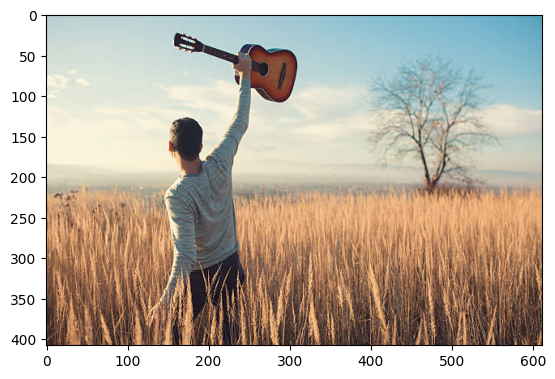

In [2]:
img_bgr = cv2.imread('./piano2.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Text(0.5, 1.0, 'Darker')

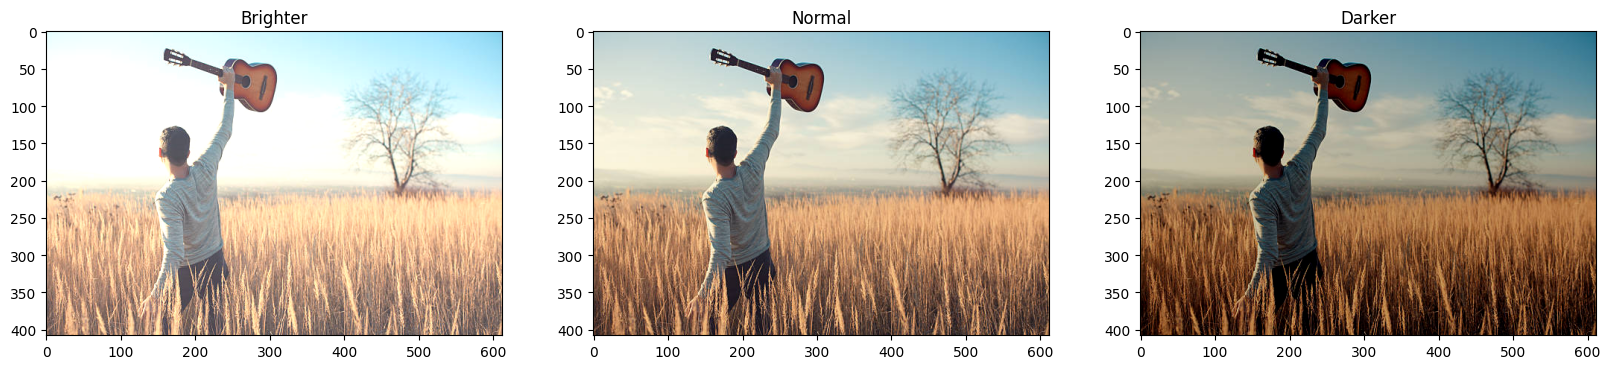

In [3]:
matrix = np.ones(img_rgb.shape, dtype='uint8') * 50
brighter = cv2.add(img_rgb, matrix)
darker = cv2.subtract(img_rgb, matrix)
plt.figure(figsize=[20,8])
plt.subplot(131);plt.imshow(brighter);plt.title('Brighter')
plt.subplot(132);plt.imshow(img_rgb);plt.title('Normal')
plt.subplot(133);plt.imshow(darker);plt.title('Darker')

Text(0.5, 1.0, 'Higher')

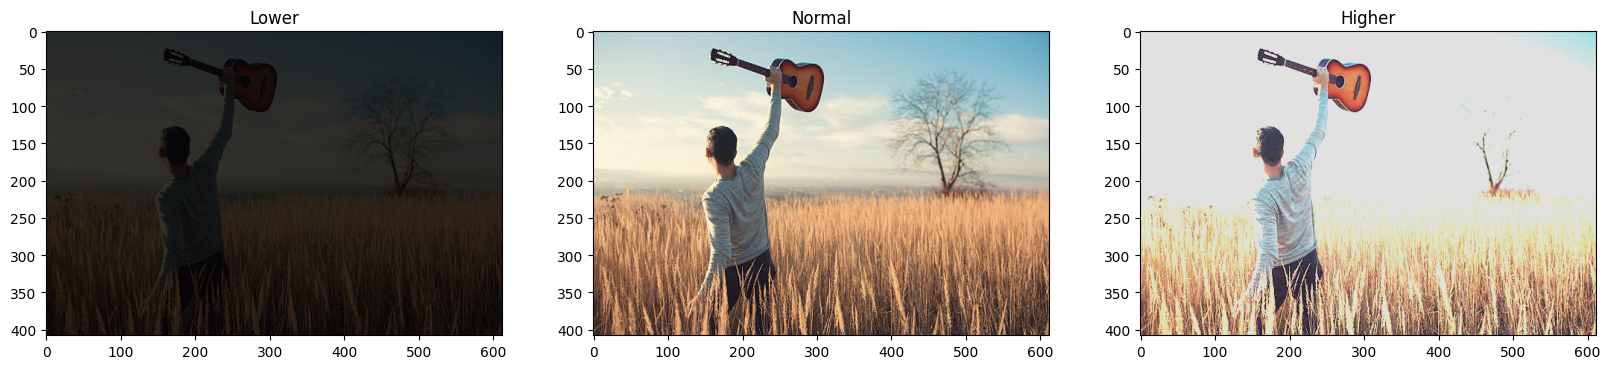

In [4]:
matrix1 = np.ones(img_rgb.shape) * 0.2
matrix2 = np.ones(img_rgb.shape) * 1.8
lower = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0,225))
plt.figure(figsize=[20,8])
plt.subplot(131);plt.imshow(lower);plt.title('Lower')
plt.subplot(132);plt.imshow(img_rgb);plt.title('Normal')
plt.subplot(133);plt.imshow(higher);plt.title('Higher')

In [5]:
HTML("""
   <video height=400 width=1024 controls>
       <source src="./racing_car.mp4" type="video/mp4">
   </video> 
""")

In [6]:
tracker_types = ["MIL", "GOTURN", "NANO", "DASIAMRPN"]
tracker_type = tracker_types[1]
if tracker_type == "NANO":
    tracker = cv2.TrackerNano.create()
elif tracker_type == "MIL":
    tracker = cv2.TrackerMIL.create()
# elif tracker_type == "KCF":
#     tracker = cv2.Tracker
# elif tracker_type == "CSRT":
#     tracker = cv2.TrackerCSRT.create()
# elif tracker_type == "TLD":
#     tracker = cv2.legacy.TrackerTLD.create()
# elif tracker_type == "MEDIANFLOW":
#     tracker = cv2.legacy.TrackerMedianFlow.create()
elif tracker_type == "GOTURN":
    tracker = cv2.TrackerGOTURN.create()
else:
    tracker = cv2.TrackerDaSiamRPN.create()

error: OpenCV(4.8.1) /io/opencv/modules/dnn/src/caffe/caffe_io.cpp:1138: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "goturn.caffemodel" in function 'ReadProtoFromBinaryFile'


In [23]:
def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0]+bbox[2]), int(bbox[1]+bbox[3]))
    cv2.rectangle(frame, p1, p2, (255,0,0),2,1)
def displayRectangle(frame, bbox):
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    # frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB)
    plt.imshow(frameCopy)
    plt.axis('off')

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


(0, 0, 0, 0)


27

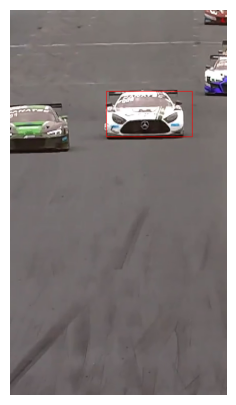

In [31]:
video = cv2.VideoCapture('./racing_car.mp4')
ok, frame = video.read()
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_output = cv2.VideoWriter(f'racecar-{tracker_type}.mp4', cv2.VideoWriter_fourcc(*'XVID'),10,(width,height))
bbox = cv2.selectROI(frame, False)
print(bbox)
bbox = (480, 405, 427, 227)
displayRectangle(frame, bbox)
cv2.waitKey(0)

In [25]:
ok = tracker.init(frame, bbox)
while True:
    # cv2.imshow('Tracking', frame)
    ok, frame = video.read()
    if not ok:
        break
    success, bbox = tracker.update(frame)
    if success:
        drawRectangle(frame, bbox)
    if cv2.waitKey(1) == 27:
        break
    video_output.write(frame)
video.release()
video_output.release()